## Các yếu tố thời tiết (nhiệt độ, độ ẩm, gió, áp suất…) có tác động và mức độ tương quan như thế nào đến lượng mưa

Tiến hành đọc dữ liệu để xem trong dữ liệu có những yếu tố thời tiết nào liên quan

In [1]:
!pip install windrose

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from windrose import WindroseAxes

In [3]:
df = pd.read_csv('../data/processed/hcm_weather_processed.csv')
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128448 entries, 0 to 128447
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   datetime                 128448 non-null  object 
 1   temperature (C degree)   128448 non-null  float64
 2   humidity (%)             128448 non-null  int64  
 3   precipitation (mm)       128448 non-null  float64
 4   windspeed (km/h)         128448 non-null  float64
 5   winddirection (degrees)  128448 non-null  int64  
 6   cloudcover (%)           128448 non-null  int64  
 7   pressure (hPa)           128448 non-null  float64
 8   dewpoint (C degree)      128448 non-null  float64
 9   month                    128448 non-null  int64  
 10  hour                     128448 non-null  int64  
 11  season                   128448 non-null  object 
 12  day_night                128448 non-null  object 
 13  location_id              128448 non-null  int64  
dtypes: f

- Các yếu tố thời tiết sẽ được phân tích và đánh giá  gồm 
    * temperature (C degree) : nhiệt độ không khí.
    * humidity (%)  : độ ẩm tương đối
    * windspeed (km/h)   : tốc độ gió
    * winddirection (degrees) : hướng gió
    * cloudcover (%) : độ che phủ của mây
    * pressure (hPa) : áp suất tại mực nước biển trung bình
    * dewpoint (C degree) :nhiệt độ điểm sương, nhiệt độ hơi nước cần lạnh đi để đạt 100% độ ẩm, từ đó bắt đầu ngưng tụ.
    
- Tiến hành chia các yếu tố sau thành 6 nhóm dựa trên sự tương đồng về đơn vị
    * Nhóm 1: temperature, dewpoint (C degree)
    * Nhóm 2: humidity, cloudcover (%)
    * Nhóm 3: winddirection (degrees)
    * Nhóm 4: windspeed (km/h)
    * Nhóm 5: pressure (hPa)

### Câu hỏi nhỏ
- Nhiệt độ có tương quan dương hay âm với lượng mưa?
- Nhiệt độ điểm sương có tương quan mạnh với khả năng mưa hay không?
- Độ ẩm ảnh hưởng như thế nào đến khả năng xuất hiện mưa?
- Áp suất khí quyển giảm có làm tăng khả năng mưa hay không?
- Tốc độ gió có liên quan tới lượng mưa trong các thời điểm xảy ra mưa?
- Hướng gió ảnh hưởng như thế nào đến phân bố lượng mưa?
- Độ che phủ mây có mối quan hệ như thế nào với lượng mưa?
- Ngưỡng giá trị nào của nhiệt độ, độ ẩm,... sẽ dẫn đến hiện tượng mưa?
- Yếu tố nào là mạnh nhất trong việc dự đoán lượng mưa?
- Có yếu tố nào chỉ có tương quan nhưng không phải nguyên nhân?

In [4]:
# Hàm vẽ biểu đồ phân tán giữa nhiệt độ và lượng mưa
def plot_scatter_with_rain(column, rain_column):
    # Lọc bỏ các ô có lượng mưa = 0
    mask = rain_column > 0
    column = column[mask]
    rain_column = rain_column[mask]
    # Biểu đồ
    plt.figure(figsize=(10, 6))
    plt.scatter(column, rain_column, alpha=0.4, edgecolor='k')
    plt.title(f'Tương quan giữa {column.name} và precipitation')
    plt.xlabel(column.name)
    plt.ylabel('Rainfall (mm)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

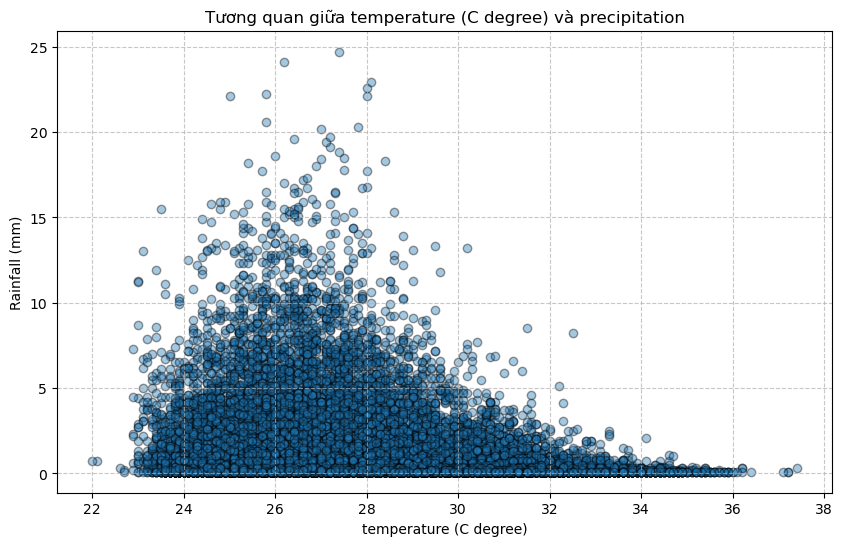

In [5]:
plot_scatter_with_rain(df['temperature (C degree)'], df['precipitation (mm)'])

#### Nhận xét:
- Từ biểu đồ phân tán ta thấy khi nhiệt độ tăng từ 22°C đến 28°C thì tần suất xuất hiện mưa càng dày đặc. Từ 28°C về sau khi nhiệt độ càng tăng thì lượng mưa càng giảm và khi đạt ngưỡng 38°C thì không còn thấy sự xuất hiện của mưa.
- Có thể thấy đối với những ngày quá nóng thường khô, những ngày mát hơn thường dễ có khả năng xuất hiện mưa.
- Lượng mưa phân bố không đều, đa số sẽ tập trung từ 0mm đến 15mm, hiếm khi xảy ra trường hợp lượng mưa lớn hơn 20mm.

=> Nhiệt độ tối ưu cho mưa là 23-29°C, nhiệt độ >30°C tần xuất xuất hiện mưa và lượng mưa giảm đáng kể.

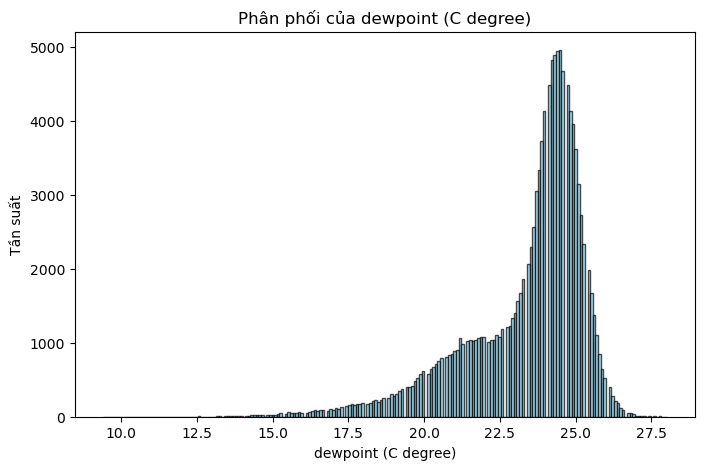

In [6]:
def histogram_by_name(df, col_name):
    plt.figure(figsize=(8, 5))
    
    data = df[col_name]
    
    plt.hist(data, bins='auto', color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Phân phối của {col_name}") 
    plt.xlabel(col_name)
    plt.ylabel("Tần suất")
    plt.show()

histogram_by_name(df, 'dewpoint (C degree)')

Dựa vào biểu đồ có thể thấy rằng giá trị dewpoint tại khu vực khảo sát tập trung chủ yếu trong khoảng 24–25°C, và tần suất giảm nhanh về cả hai phía ngoài khoảng này. Điều này cho thấy phần lớn thời gian không khí duy trì độ ẩm rất cao, gần mức bão hòa. Ngoài ra, các giá trị dewpoint thấp hơn — đặc biệt dưới 17°C — xuất hiện rất ít, cho thấy môi trường hầu như không bao giờ khô, và điều kiện khí hậu luôn nghiêng về trạng thái nóng ẩm.

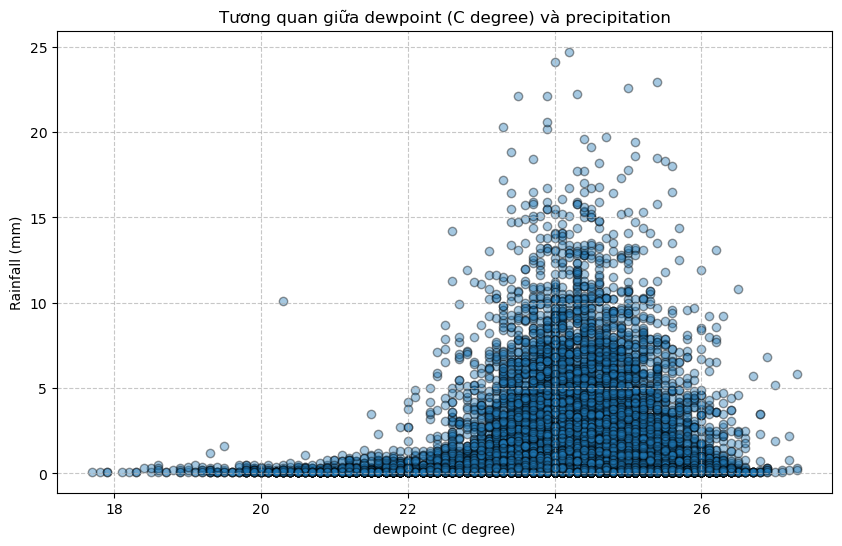

In [7]:
plot_scatter_with_rain(df['dewpoint (C degree)'], df['precipitation (mm)'])

- Từ biểu đồ có thể thấy rằng mưa xuất hiện với tần suất cao và lượng mưa lớn nhất khi dewpoint nằm trong khoảng 23.5–25°C. Đây là vùng mà không khí đạt mức ẩm rất cao và gần như bão hòa hơi nước, nên điều kiện hình thành mưa trở nên thuận lợi nhất. Lượng mưa mạnh (10–20 mm) hầu như chỉ xuất hiện khi dewpoint vượt 23°C.
- Ngược lại, ở các giá trị dewpoint thấp hơn, mưa vẫn có xảy ra nhưng chủ yếu với lượng nhỏ, thường dưới 3 mm. Khi dewpoint quá cao (>25°C), mặc dù độ ẩm vẫn lớn, tần suất và cường độ mưa không còn tăng thêm.
    * => Điều này cho thấy rằng mưa chỉ dễ hình thành khi không khí vừa đủ ẩm và đủ nóng, nằm trong một khoảng dewpoint phù hợp; vượt quá hoặc thấp hơn vùng này thì khả năng mưa giảm.

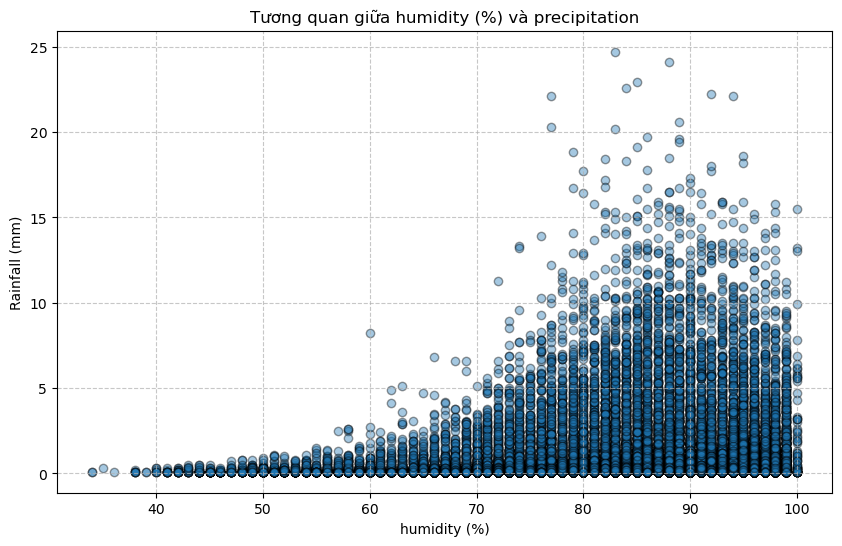

In [8]:
plot_scatter_with_rain(df['humidity (%)'], df['precipitation (mm)'])

- Lượng mưa có xu hướng tăng dần khi độ ẩm tăng lên. Ở các mức độ ẩm thấp (dưới 50%), lượng mưa hầu như rất thấp hoặc gần bằng 0. Tuy nhiên, khi độ ẩm tăng lên khoảng 70-80%, lượng mưa có sự gia tăng rõ rệt
- Mặc dù có một xu hướng chung là lượng mưa tăng khi độ ẩm cao, nhưng vẫn có sự phân tán lớn ở các mức độ ẩm cao. Điều này có thể chỉ ra rằng ngoài độ ẩm, còn có các yếu tố khác ảnh hưởng đến lượng mưa như nhiệt độ, gió, và các yếu tố khí tượng khác.
- Ở các điểm có độ ẩm rất cao (trên 90%), có một số điểm cho thấy lượng mưa rất lớn, lên đến 20mm hoặc hơn, cho thấy mưa có thể cực kỳ mạnh mẽ khi độ ẩm rất cao.

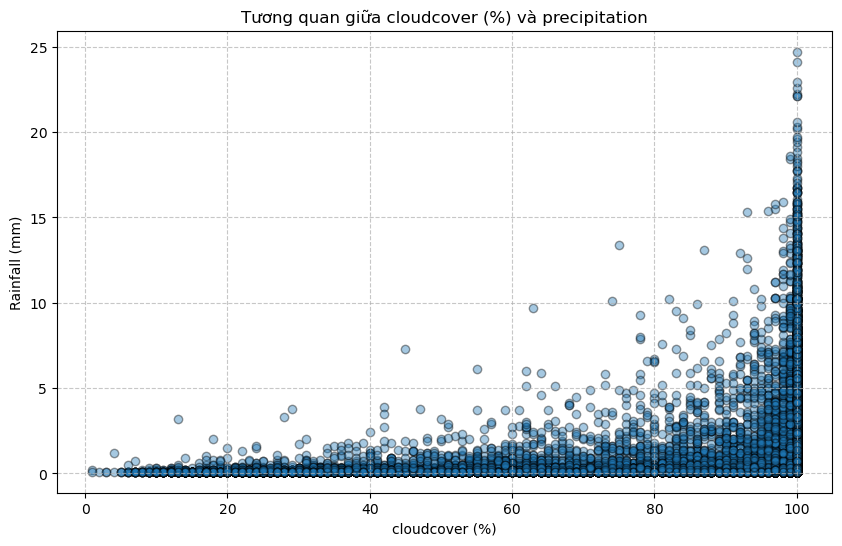

In [9]:
plot_scatter_with_rain(df['cloudcover (%)'], df['precipitation (mm)'])

- Lượng mưa có xu hướng tăng lên khi mức độ mây che phủ tăng. Ở mức độ mây thấp (dưới 30%), lượng mưa phần lớn rất thấp hoặc gần bằng 0. Tuy nhiên, khi mức độ mây che phủ tăng (trên 50-60%), lượng mưa bắt đầu có sự gia tăng rõ rệt.
- Từ khoảng 80% mây trở lên, lượng mưa có thể tăng đột biến, với một số điểm cho thấy lượng mưa lên tới hơn 20mm. Điều này cho thấy khi có rất nhiều mây, khả năng xảy ra mưa lớn là rất cao.
- Ở những mức độ mây thấp (dưới 50%), lượng mưa có xu hướng ở mức thấp và ít thay đổi, chỉ có vài điểm có lượng mưa nhẹ trong các điều kiện này.

In [10]:
def windrose_plot(df, direction_col, speed_col):
    wd = df[direction_col]
    ws = df[speed_col]

    # Tạo figure
    plt.figure(figsize=(8, 8))
    ax = WindroseAxes.from_ax()
    ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='black')
    ax.set_title(f"Wind Rose của {direction_col} và {speed_col}")
    ax.set_legend(title="Tốc độ gió (km/h)")

    plt.show()

<Figure size 800x800 with 0 Axes>

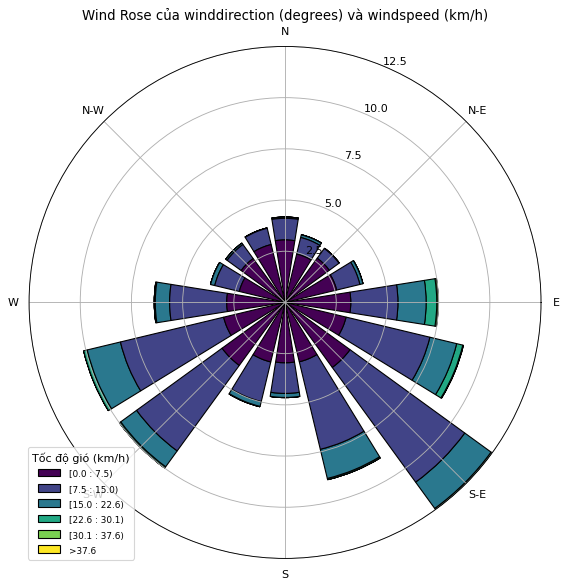

In [11]:
windrose_plot(df, 'winddirection (degrees)', 'windspeed (km/h)')


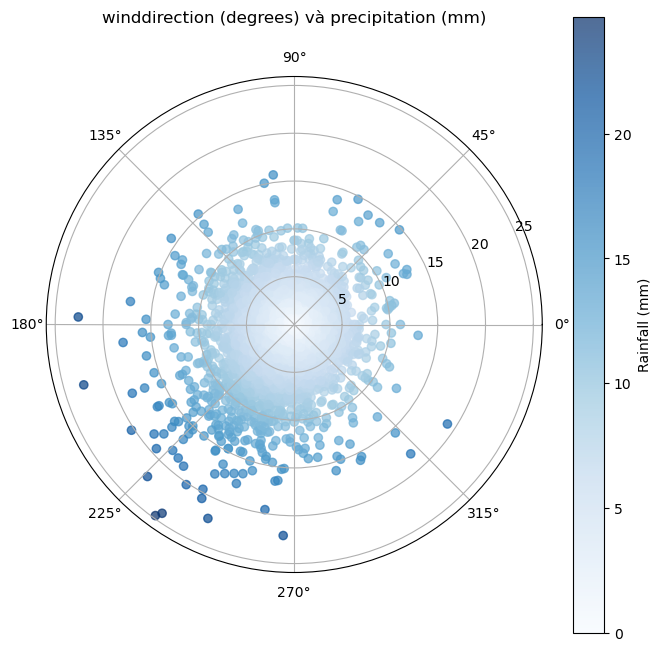

In [12]:
#  Vẽ biểu đồ tương quan: hướng gió (độ) vs lượng mưa (mm)
def polar_scatter_rainfall(df, direction_col, rain_col):

    wd = df[direction_col]
    rain = df[rain_col]

    # Chuyển độ sang radian
    angles = np.deg2rad(wd)

    # Tạo biểu đồ
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')

    scatter = ax.scatter(
        angles, rain,
        c=rain,
        cmap='Blues',
        alpha=0.7
    )

    ax.set_title(f"{direction_col} và {rain_col}", pad=20)
    plt.colorbar(scatter, label="Rainfall (mm)")

    plt.show()
    
polar_scatter_rainfall(df, 'winddirection (degrees)', 'precipitation (mm)')


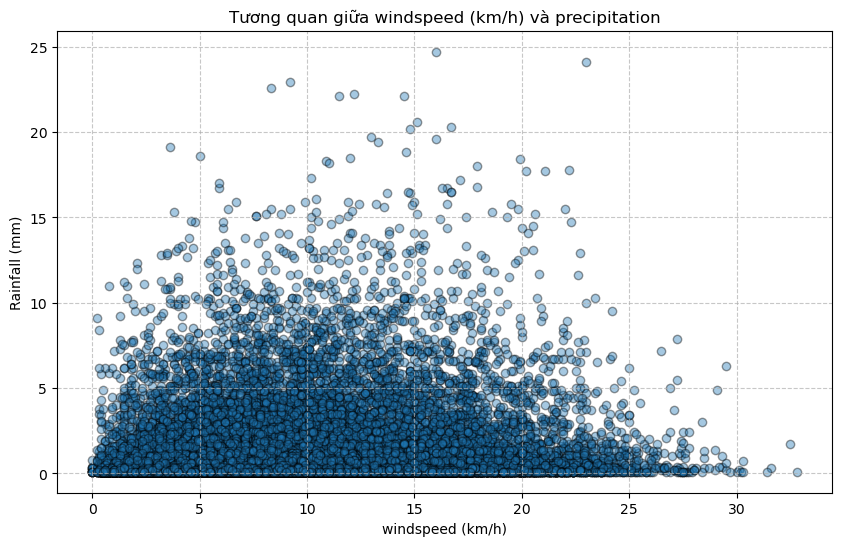

In [13]:
plot_scatter_with_rain(df['windspeed (km/h)'], df['precipitation (mm)'])

- Dựa vào 3 biểu đồ ta thấy được rằng hướng gió cũng như tốc độ của gió không ảnh hưởng đáng kể đến khả năng xuất hiện mưa 
- Các điểm dữ liệu cho thấy sự phân bố mưa gần như đều ở tất cả các hướng gió và tốc độ gió, với lượng mưa không quá cao trong phần lớn các khu vực.

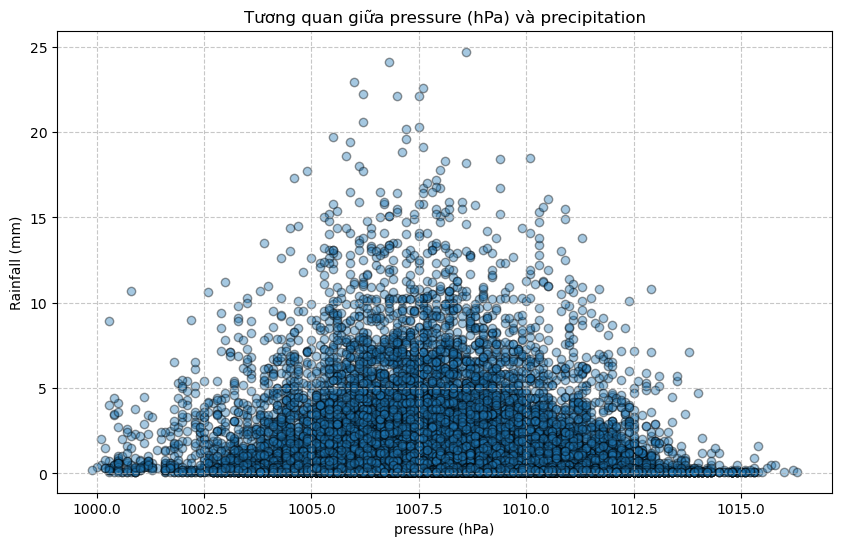

In [14]:
plot_scatter_with_rain(df['pressure (hPa)'], df['precipitation (mm)'])

- Không quan sát thấy mối quan hệ tuyến tính rõ ràng giữa áp suất khí quyển và lượng mưa.
- Những điểm có lượng mưa >10 mm tập trung chủ yếu trong khoảng 1005–1010 hPa; ngoài khoảng này — đặc biệt ở mức áp suất quá cao (>1013 hPa) hoặc quá thấp (<1002 hPa) — lượng mưa lớn xuất hiện thưa thớt hơn.
- Lượng mưa nhỏ xuất hiện ở hầu hết các mức áp suất, thể hiện qua phân bố dạng “hình chuông mở rộng”, cho thấy áp suất khí quyển không phải là yếu tố quyết định khả năng xảy ra mưa.

## NHẬN XÉT CHUNG
#### Ngưỡng giá trị nào của nhiệt độ, độ ẩm,... sẽ dẫn đến hiện tượng mưa?
- Nhiệt độ:
    * Ngưỡng thuận lợi cho mưa là 23-29°C, trong khoảng này tần suất xuất hiện mưa dày đặc nhất. Điều này cho thấy khi không khí đủ nóng để giữ hơi nước và đủ mát để hơi nước ngưng tụ => thì khả năng xuất hiện mưa là rất lớn
    * Nhiệt độ quá nóng (>30°C) tần suất xuất hiện mưa và lượng mưa giảm mạnh, khi vượt ngưỡng 38°C thì gần như không có mưa

- Độ ẩm:
    * Ngưỡng độ ẩm gây ra mưa là từ 70% trở lên, tần suất xuất hiện mưa ở khoảng này khá dày đặc và đặc biệt khi độ ẩm >85% thì xuất hiện nhiều những cơn mưa có lượng mưa lớn (10mm-20mm)
    * Khi đọ ẩm thấp hơn 50% gần như không có mưa trong khoảng này
- Dewpoint:
    * Dewpoint thuận lợi cho mưa là 23.5-25°C. Đây là vùng không khí gần như bão hòa, mưa xuất hiện nhiều nhất, đồng thời cũng xuất hiện nhiều cơn mưa có lượng mưa 10-20mm
    * Tuy nhiên khi dewpoint vượt 25°C, mặc dù độ ẩm vẫn lớn, tần suất và cường độ mưa không còn tăng thêm.
- Tỷ lệ mây:
    * Khi tỉ lệ mây >=75%, tần suất xuất hiện mưa bắt đầu tăng mạnh, đặc biệt khi tỷ lệ mây >=85% khả năng xảy ra mưa lớn (>20mm) là rất cao.
    
- Áp suất:
    * Áp suất thuận lợi để xảy ra mưa là 1005-1010 hPa
- Gió và hướng gió : không có ngưỡng cũng như ảnh hưởng đáng kể đến sự xuất hiện của mưa

#### Yếu tố nào là mạnh nhất trong việc dự đoán lượng mưa? Có yếu tố nào chỉ có tương quan nhưng không phải nguyên nhân?
- Yếu tố mạnh nhất trong việc dự đoán lượng mưa là dewpoint, vì đây là đại lượng phản ánh trực tiếp lượng hơi nước thực tế có trong không khí. Khi dewpoint tiến gần đến nhiệt độ không khí, môi trường đạt trạng thái bão hòa, hơi nước bắt đầu ngưng tụ và khả năng xuất hiện mưa tăng mạnh. Dữ liệu cho thấy khi dewpoint nằm trong khoảng 23.5–25°C, hàm lượng hơi nước trong khí quyển đạt mức rất cao, tạo điều kiện thuận lợi nhất để mưa hình thành.
- Độ ẩm là yếu tố quan trọng thứ hai, khi vượt 70–80% lượng mưa tăng rõ rệt, trên 80% có thể xuất hiện mưa lớn. Nhiệt độ tác động gián tiếp, mưa nhiều nhất ở 23–29°C, giảm khi ≥30°C. Mây, áp suất, gió chỉ là yếu tố hỗ trợ, không trực tiếp tạo mưa.
